## SOM with real data sets
https://github.com/fcomitani/simpsom 


### Import used packages

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

#Import the library #https://github.com/fcomitani/SimpSOM
import simpsom as sps


### Iris dataset 

In [6]:
Iris = pd.read_csv('Iris.csv')
labels = Iris['Species'].values

Iris = Iris.drop(Iris.columns[[0,-1]],axis=1)

scaler = StandardScaler()
scaler= scaler.fit(Iris.values)
train = scaler.transform(Iris.values)
#print(train.shape)


In [7]:
net = sps.SOMNet(20, 20, train, PBC=True) 
net.train()
#Save the weights to file
net.save('som_iris_weights')


Periodic Boundary Conditions active.
The weights will be initialized with PCA.
The map will be trained with the batch algorithm.
Training SOM... done!


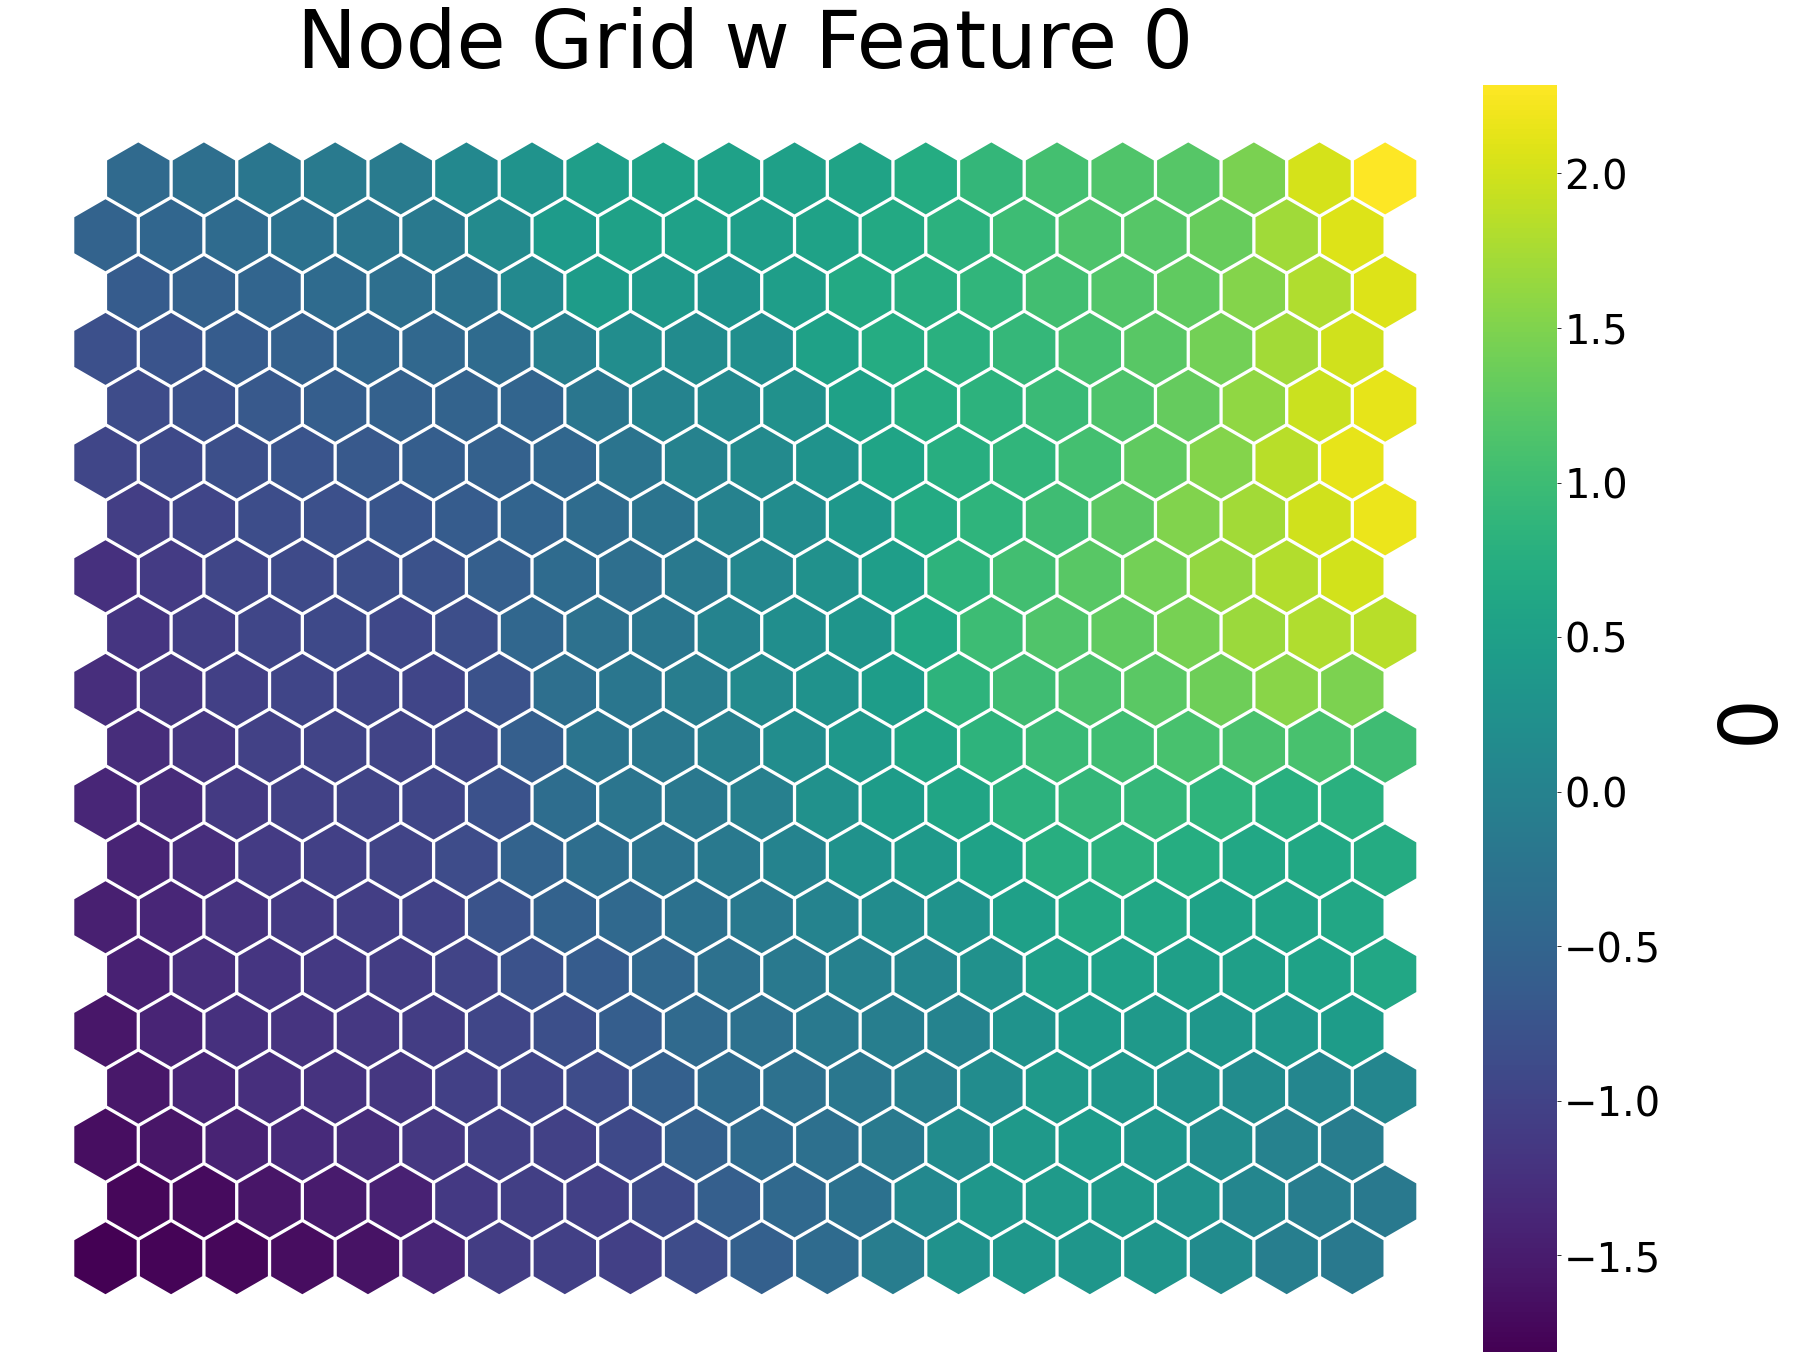

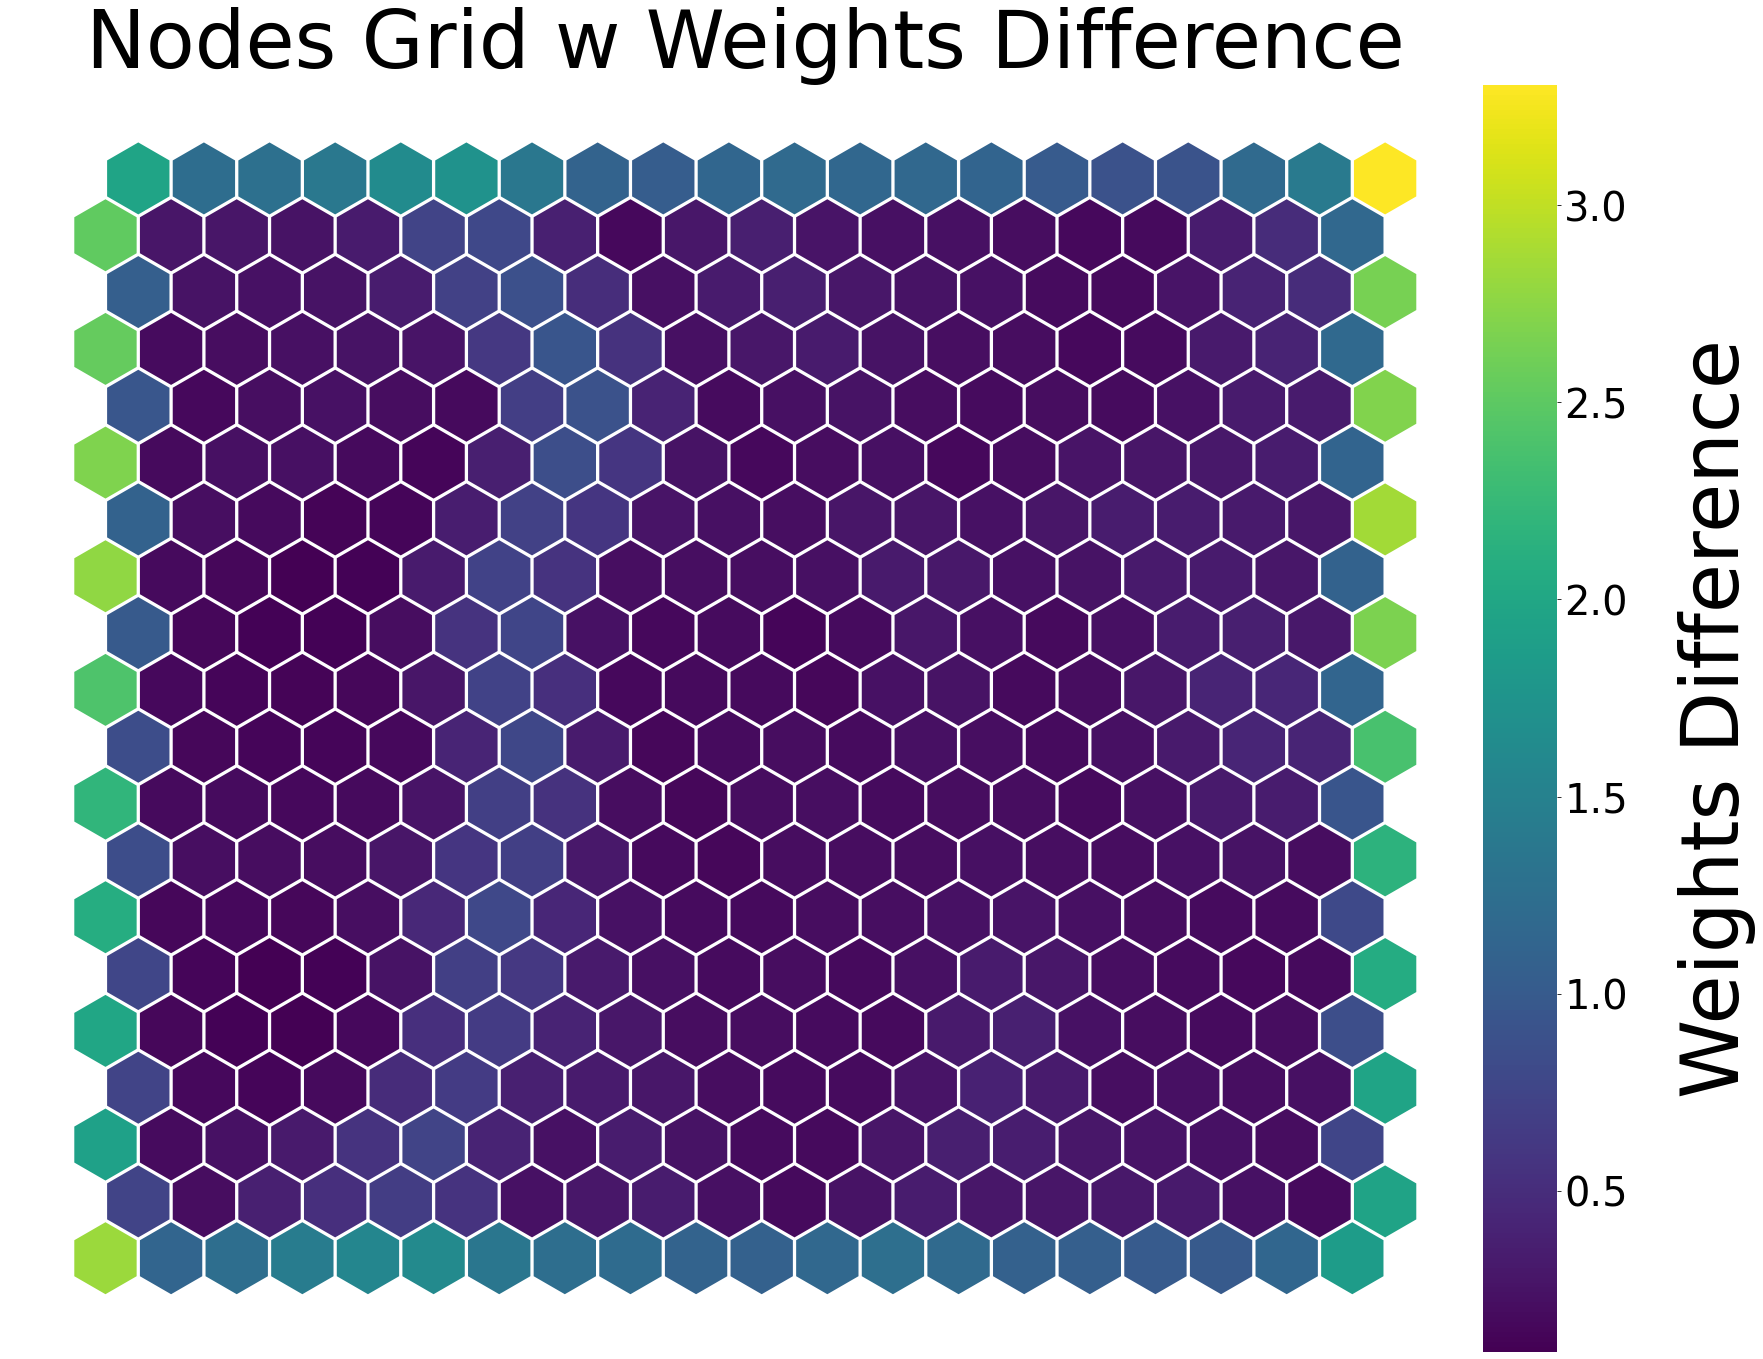

In [8]:
#Print a map of the network nodes and colour them according to the first feature (column number 0) of the dataset
#and then according to the distance between each node and its neighbours.
net.nodes_graph(colnum=0)
net.diff_graph()

[[3.0, 10.392304845413264],
 [4.0, 3.4641016151377553],
 [0.0, 5.196152422706632],
 [0.5, 2.598076211353316],
 [1.0, 10.392304845413264],
 [1.5, 14.722431864335457],
 [0.0, 6.9282032302755105],
 [2.5, 7.794228634059948],
 [2.0, 0.0],
 [2.5, 4.330127018922194],
 [3.0, 13.856406460551021],
 [0.5, 7.794228634059948],
 [2.5, 2.598076211353316],
 [0.0, 0.0],
 [2.5, 16.454482671904337],
 [0.5, 16.454482671904337],
 [1.5, 14.722431864335457],
 [3.0, 10.392304845413264],
 [4.0, 15.588457268119896],
 [0.5, 12.99038105676658],
 [5.0, 12.124355652982143],
 [1.0, 12.124355652982143],
 [0.0, 10.392304845413264],
 [5.0, 6.9282032302755105],
 [0.5, 7.794228634059948],
 [4.5, 4.330127018922194],
 [4.5, 7.794228634059948],
 [3.5, 11.258330249197702],
 [4.5, 11.258330249197702],
 [1.0, 5.196152422706632],
 [2.0, 3.4641016151377553],
 [6.0, 12.124355652982143],
 [0.0, 15.588457268119896],
 [0.5, 16.454482671904337],
 [2.5, 4.330127018922194],
 [3.5, 6.062177826491071],
 [5.0, 13.856406460551021],
 [2.5, 

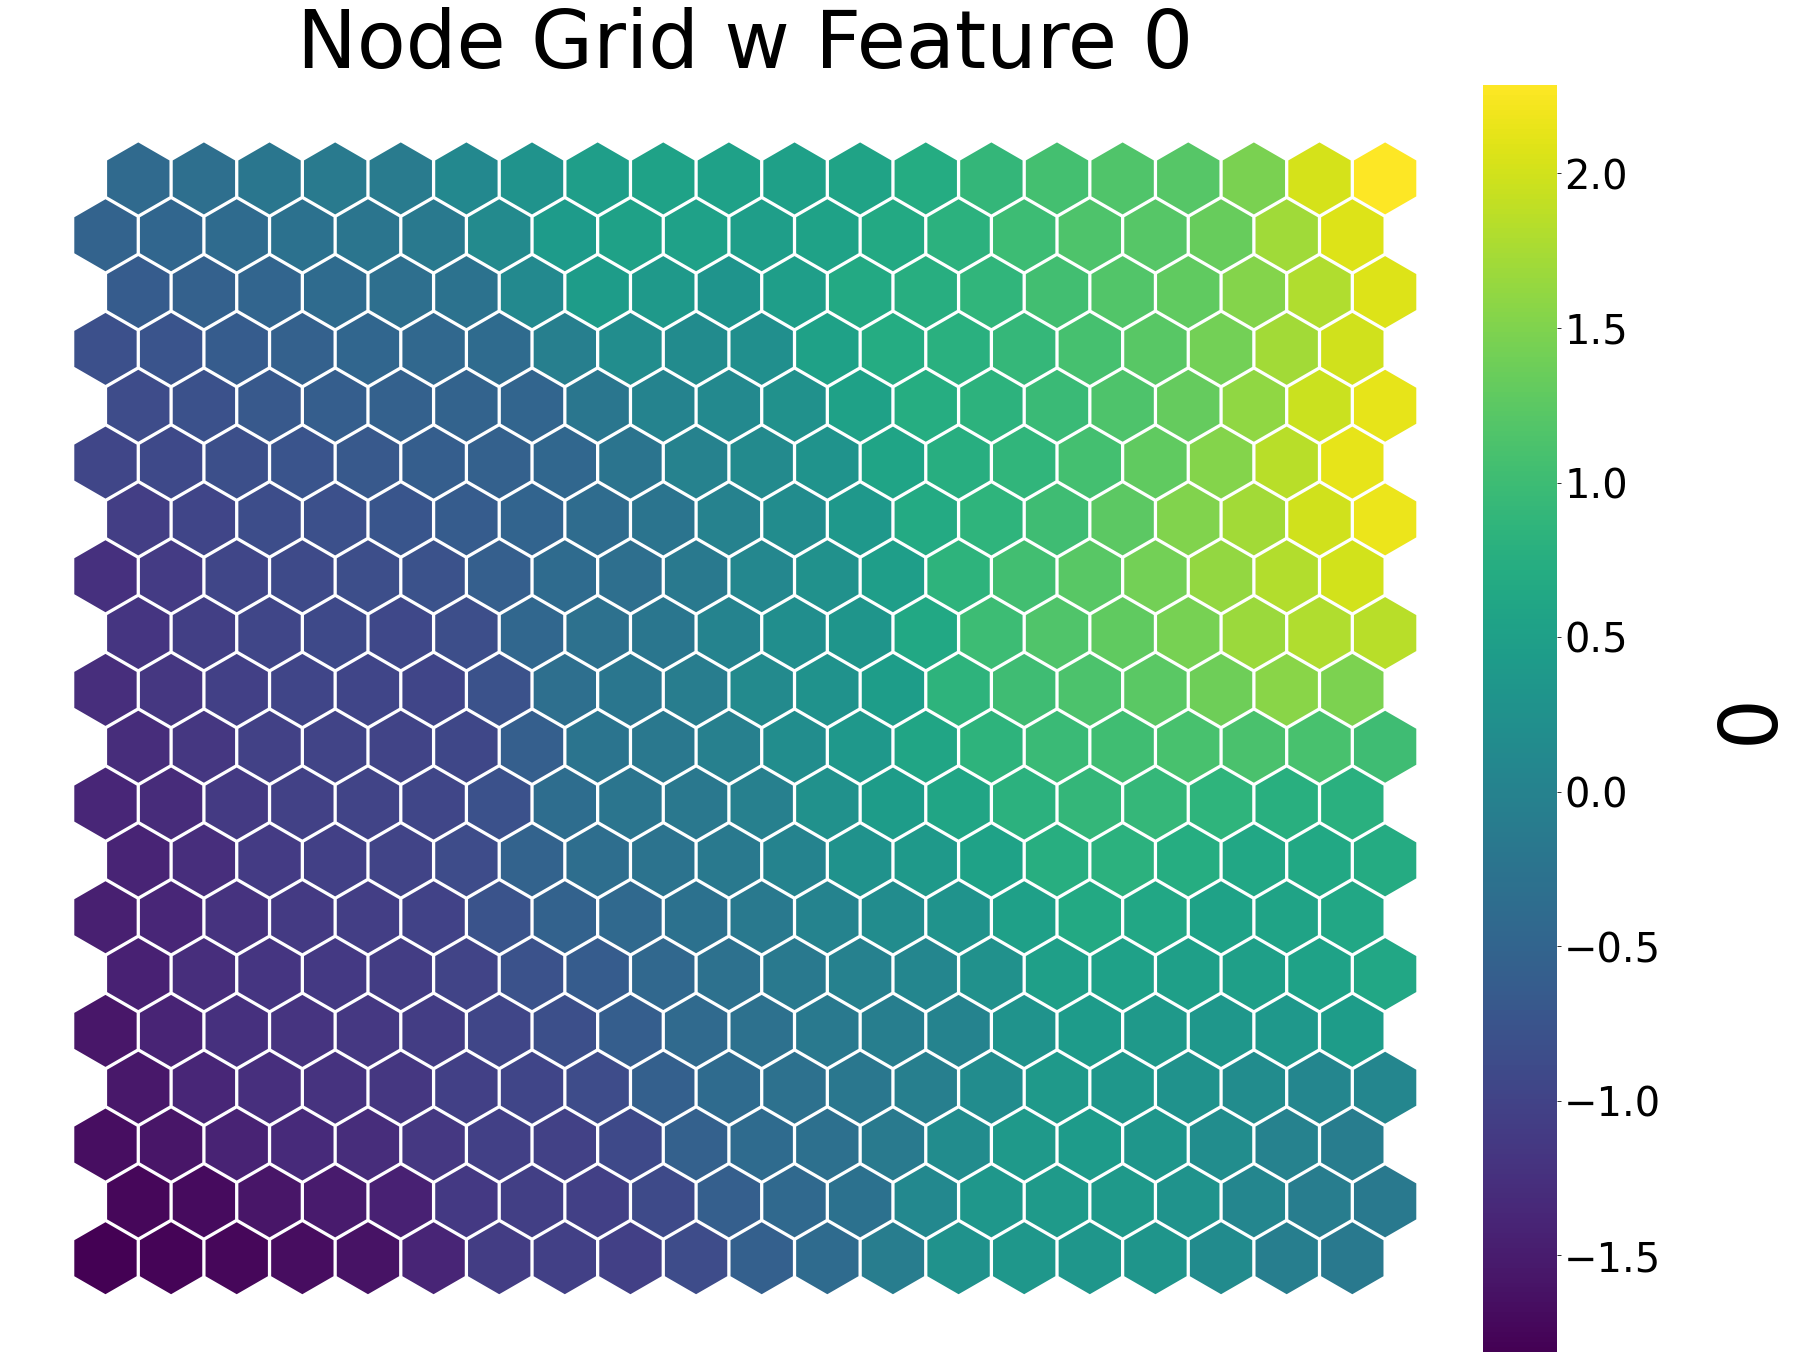

<Figure size 2000x2000 with 0 Axes>

In [12]:
net.nodes_graph(colnum=0)
net.diff_graph()
net.project(train, labels=labels,out_path='.')

In [13]:
net2 = sps.SOMNet(10, 10, train,load_file='som_iris_weights.npy')

Periodic Boundary Conditions inactive.
The weights will be loaded from file.


[[3.0, 10.392304845413264],
 [4.0, 3.4641016151377553],
 [0.0, 5.196152422706632],
 [0.5, 2.598076211353316],
 [1.0, 10.392304845413264],
 [1.5, 14.722431864335457],
 [0.0, 6.9282032302755105],
 [2.5, 7.794228634059948],
 [2.0, 0.0],
 [2.5, 4.330127018922194],
 [3.0, 13.856406460551021],
 [0.5, 7.794228634059948],
 [2.5, 2.598076211353316],
 [0.0, 0.0],
 [2.5, 16.454482671904337],
 [0.5, 16.454482671904337],
 [1.5, 14.722431864335457],
 [3.0, 10.392304845413264],
 [4.0, 15.588457268119896],
 [0.5, 12.99038105676658],
 [5.0, 12.124355652982143],
 [1.0, 12.124355652982143],
 [0.0, 10.392304845413264],
 [5.0, 6.9282032302755105],
 [0.5, 7.794228634059948],
 [4.5, 4.330127018922194],
 [4.5, 7.794228634059948],
 [3.5, 11.258330249197702],
 [4.5, 11.258330249197702],
 [1.0, 5.196152422706632],
 [2.0, 3.4641016151377553],
 [6.0, 12.124355652982143],
 [0.0, 15.588457268119896],
 [0.5, 16.454482671904337],
 [2.5, 4.330127018922194],
 [3.5, 6.062177826491071],
 [5.0, 13.856406460551021],
 [2.5, 

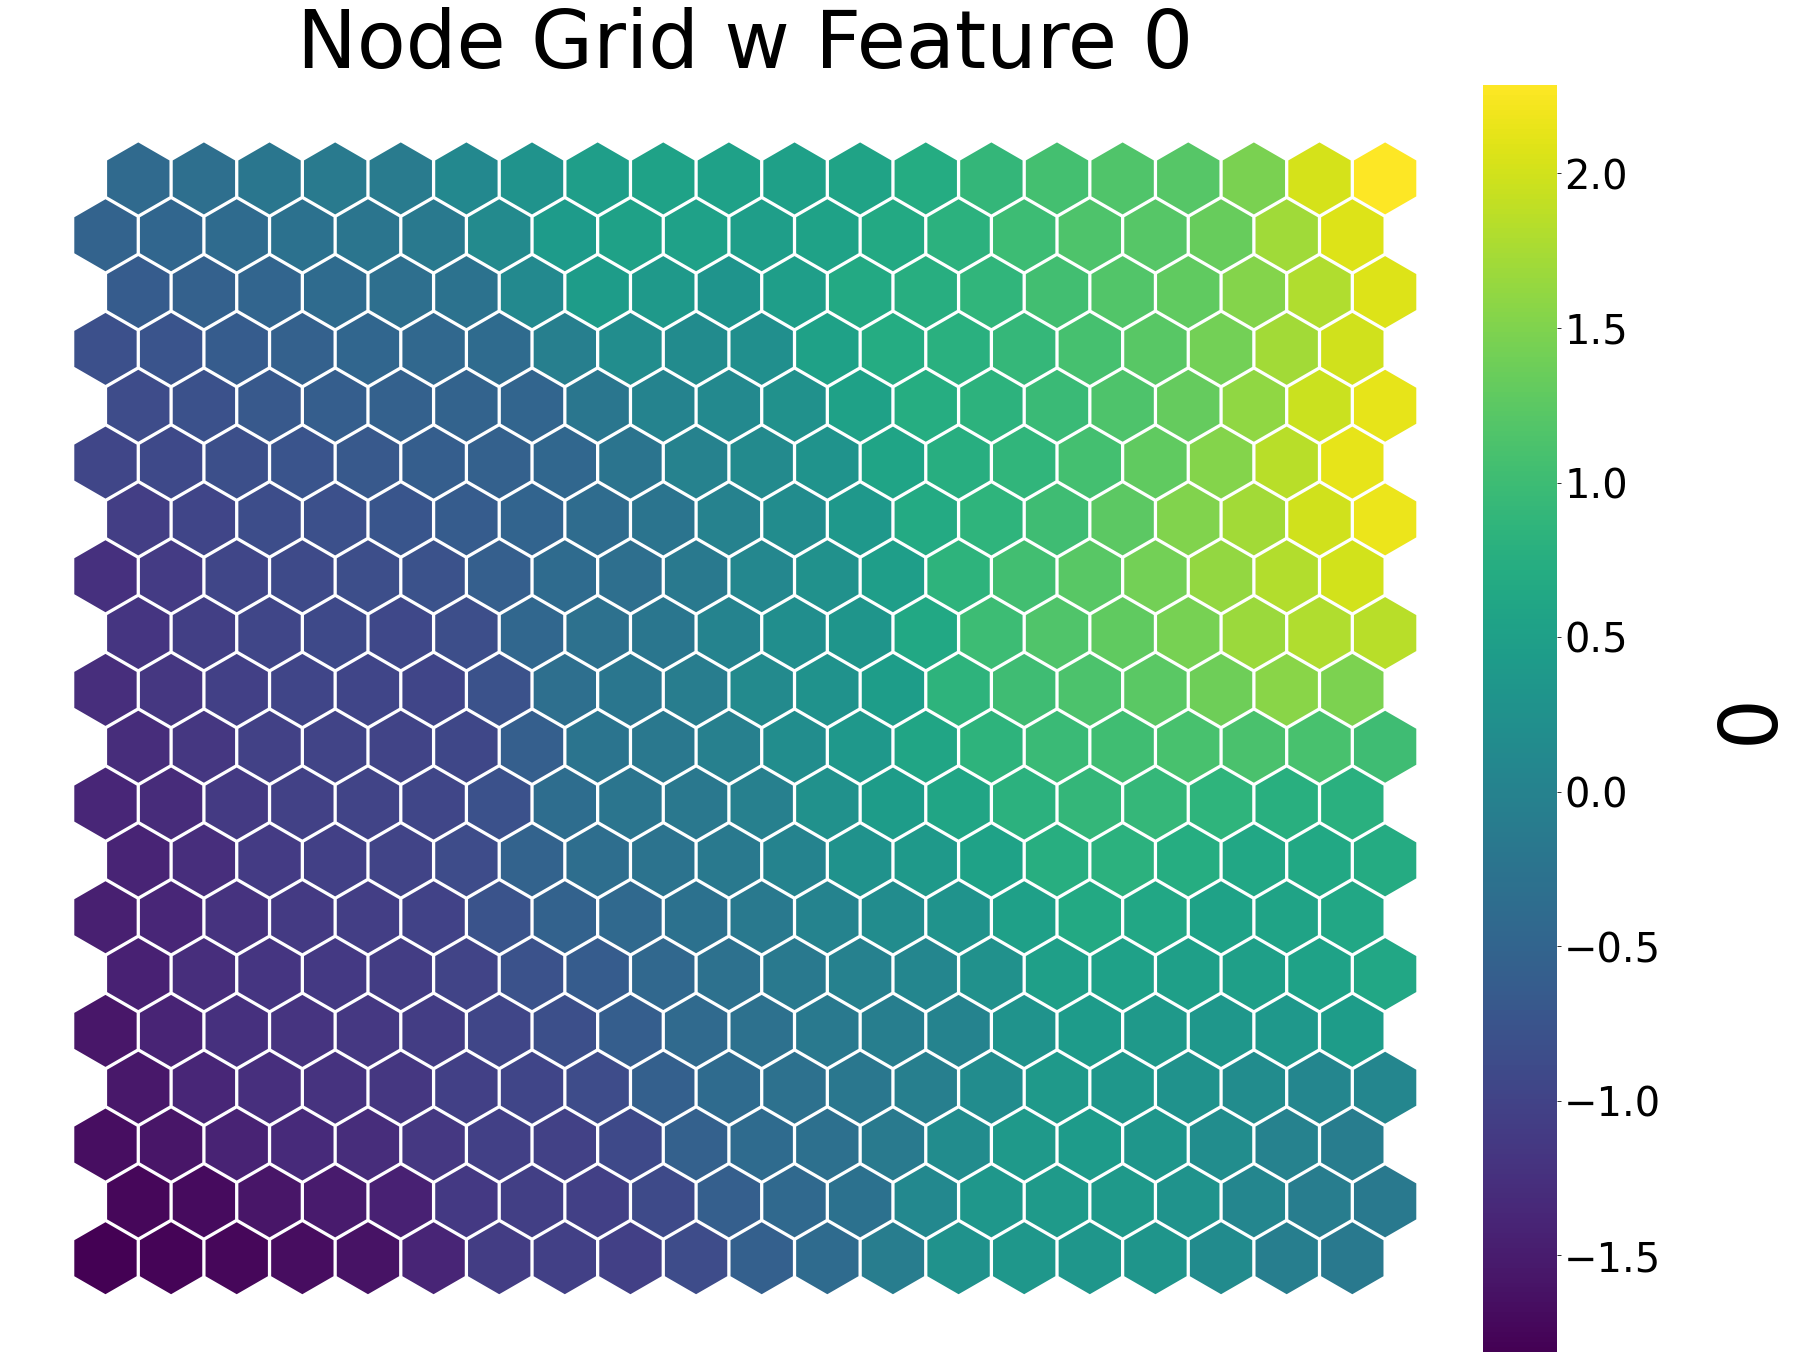

<Figure size 2000x2000 with 0 Axes>

In [14]:
net2.nodes_graph(colnum=0)
net2.diff_graph()
net2.project(train, labels=labels)

In [15]:
print(net.node_list[0].pos)
print(net.node_list[1].pos)
print(net.node_list[2].pos)
print(net.node_list[3].pos)

[0. 0.]
[0.5       0.8660254]
[0.         1.73205081]
[0.5        2.59807621]


In [16]:
net.node_list[3].weights

array([-1.54109839,  0.13238991, -1.32612532, -1.32633226])

In [17]:
p = np.ones([100,2])

In [18]:
for i in range(100):
    p[i,:] = net.node_list[i].pos

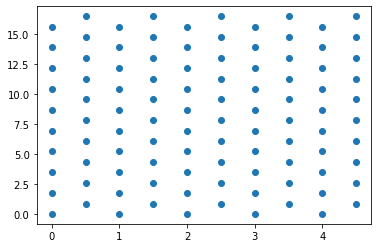

In [19]:
plt.scatter(p[:,0],p[:,1])